# Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Importing the dataset

In [2]:
df= pd.read_csv("Churn Dataset.csv", index_col= "Unnamed: 0") # dropping "Unnamed" feature coz not much needed
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,female,no,yes,no,1,no,no phone service,dsl,no,yes,no,no,no,no,month-to-month,yes,electronic check,29.85,29.85,no
1,male,no,no,no,34,yes,no,dsl,yes,no,yes,no,no,no,one year,no,mailed check,56.95,1889.50,no
2,male,no,no,no,2,yes,no,dsl,yes,yes,no,no,no,no,month-to-month,yes,mailed check,53.85,108.15,yes
3,male,no,no,no,45,no,no phone service,dsl,yes,no,yes,yes,no,no,one year,no,bank transfer (automatic),42.30,1840.75,no
4,female,no,no,no,2,yes,no,fiber optic,no,no,no,no,no,no,month-to-month,yes,electronic check,70.70,151.65,yes


In [3]:
# checking for the number of unique values in the dataset
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [4]:
# Checking for the shape and size of the dataset
print("Shape: ", df.shape)
print("Size: ", df.size)

Shape:  (7010, 20)
Size:  140200


In [5]:
# Checking for the null values of the dataset
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
# Checking for duplicate data 
df.duplicated().sum()

np.int64(0)

In [7]:
# checking the information for whole dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7010 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7010 non-null   object 
 1   SeniorCitizen     7010 non-null   object 
 2   Partner           7010 non-null   object 
 3   Dependents        7010 non-null   object 
 4   tenure            7010 non-null   int64  
 5   PhoneService      7010 non-null   object 
 6   MultipleLines     7010 non-null   object 
 7   InternetService   7010 non-null   object 
 8   OnlineSecurity    7010 non-null   object 
 9   OnlineBackup      7010 non-null   object 
 10  DeviceProtection  7010 non-null   object 
 11  TechSupport       7010 non-null   object 
 12  StreamingTV       7010 non-null   object 
 13  StreamingMovies   7010 non-null   object 
 14  Contract          7010 non-null   object 
 15  PaperlessBilling  7010 non-null   object 
 16  PaymentMethod     7010 non-null   object 
 17  

In [8]:
# statistical description of the data of the numerical features
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7010.000000,7010.000000,7010.000000
mean,32.520399,64.888666,2290.353388
std,24.520441,30.064769,2266.820832
min,1.000000,18.250000,18.800000
25%,9.000000,35.750000,408.312500
50%,29.000000,70.400000,1403.875000
75%,56.000000,89.900000,3807.837500
max,72.000000,118.750000,8684.800000


In [9]:
# Checking for the skewness
df.skew(numeric_only= True)

tenure            0.233740
MonthlyCharges   -0.225686
TotalCharges      0.958322
dtype: float64

# Splitting the dataset

In [10]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
# Identifying the inputs (x) and output (y)
x= df[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges']]
y= df["Churn"]

In [12]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,female,no,yes,no,1,no,no phone service,dsl,no,yes,no,no,no,no,month-to-month,yes,electronic check,29.85,29.85
1,male,no,no,no,34,yes,no,dsl,yes,no,yes,no,no,no,one year,no,mailed check,56.95,1889.50
2,male,no,no,no,2,yes,no,dsl,yes,yes,no,no,no,no,month-to-month,yes,mailed check,53.85,108.15
3,male,no,no,no,45,no,no phone service,dsl,yes,no,yes,yes,no,no,one year,no,bank transfer (automatic),42.30,1840.75
4,female,no,no,no,2,yes,no,fiber optic,no,no,no,no,no,no,month-to-month,yes,electronic check,70.70,151.65


In [13]:
y.head()

0     no
1     no
2    yes
3     no
4    yes
Name: Churn, dtype: object

## Task: Classification (target variable is "Churn", it contains two unique categories/ categorical data, this is why our task is classification)

### Evaluation Metric for classification: Accuracy

In [14]:
# Split into train test split

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,train_size=0.7, random_state=42)

In [15]:
x_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1638,female,no,yes,yes,68,yes,yes,fiber optic,no,yes,yes,no,no,no,two year,yes,credit card (automatic),84.40,5746.75
4079,female,no,yes,no,10,yes,yes,fiber optic,yes,no,no,no,no,no,month-to-month,yes,credit card (automatic),78.15,765.15
1890,female,no,yes,yes,1,yes,no,no,no internet service,no internet service,no internet service,no internet service,no internet service,no internet service,month-to-month,yes,electronic check,21.00,21.00
4708,female,no,yes,yes,56,yes,no,dsl,yes,yes,yes,no,no,no,two year,yes,credit card (automatic),61.30,3346.80
1620,female,no,yes,yes,2,no,no phone service,dsl,no,no,no,yes,no,no,month-to-month,no,bank transfer (automatic),29.05,44.75


In [16]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(4907, 19) (4907,)
(2103, 19) (2103,)


In [20]:
x_train_num = x_train.select_dtypes(include = [int , float])
x_test_num = x_test.select_dtypes(include = [int , float])
x_train_num.head()

,tenure,MonthlyCharges,TotalCharges
1638,68,84.40,5746.75
4079,10,78.15,765.15
1890,1,21.00,21.00
4708,56,61.30,3346.80
1620,2,29.05,44.75


## Separating Categorical and numerical columns of train data

In [17]:
x_train_cat= x_train.select_dtypes(include= ["object"])
x_train_cat.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
1638,female,no,yes,yes,yes,yes,fiber optic,no,yes,yes,no,no,no,two year,yes,credit card (automatic)
4079,female,no,yes,no,yes,yes,fiber optic,yes,no,no,no,no,no,month-to-month,yes,credit card (automatic)
1890,female,no,yes,yes,yes,no,no,no internet service,no internet service,no internet service,no internet service,no internet service,no internet service,month-to-month,yes,electronic check
4708,female,no,yes,yes,yes,no,dsl,yes,yes,yes,no,no,no,two year,yes,credit card (automatic)
1620,female,no,yes,yes,no,no phone service,dsl,no,no,no,yes,no,no,month-to-month,no,bank transfer (automatic)


In [18]:
x_train_num= x_train.select_dtypes(include= ["int64", "float64"])
x_train_num.head()

,tenure,MonthlyCharges,TotalCharges
1638,68,84.40,5746.75
4079,10,78.15,765.15
1890,1,21.00,21.00
4708,56,61.30,3346.80
1620,2,29.05,44.75


## Feature scaling and train the model

In [21]:
# Rescaling numerical features 

from sklearn.preprocessing import StandardScaler as SC
scaler= SC()

x_train_num_rescaled= pd.DataFrame(scaler.fit_transform(x_train_num),
                                  columns= x_train_num.columns,
                                  index= x_train_num.index)


x_test_num_rescaled= pd.DataFrame(scaler.fit_transform(x_test_num),
                                  columns= x_test_num.columns,
                                  index= x_test_num.index)


x_train_num_rescaled.head()

,tenure,MonthlyCharges,TotalCharges
1638,1.446346,0.646133,1.525254
4079,-0.915363,0.438526,-0.670743
1890,-1.281835,-1.459830,-0.998781
4708,0.957717,-0.121181,0.467304
1620,-1.241116,-1.192433,-0.988311


In [22]:
x_train_num.describe()

,tenure,MonthlyCharges,TotalCharges
count,4907.000000,4907.000000,4907.000000
mean,32.479927,64.948166,2286.725667
std,24.560992,30.108055,2268.722353
min,1.000000,18.250000,18.800000
25%,9.000000,35.650000,410.525000
50%,29.000000,70.400000,1406.000000
75%,55.000000,89.925000,3808.100000
max,72.000000,118.750000,8684.800000


In [23]:
x_train_num_rescaled.describe()

,tenure,MonthlyCharges,TotalCharges
count,4.907000e+03,4.907000e+03,4.907000e+03
mean,-1.151175e-16,-3.851730e-16,1.592820e-17
std,1.000102e+00,1.000102e+00,1.000102e+00
min,-1.281835e+00,-1.551177e+00,-9.997507e-01
25%,-9.560819e-01,-9.731998e-01,-8.270699e-01
50%,-1.416995e-01,1.810941e-01,-3.882429e-01
75%,9.169975e-01,8.296577e-01,6.706547e-01
max,1.609223e+00,1.787140e+00,2.820410e+00


In [24]:
x_test_num_rescaled.head()

,tenure,MonthlyCharges,TotalCharges
6882,1.571532,1.164772,2.158118
6752,-0.843994,-0.497273,-0.772079
245,-1.171523,0.353774,-0.895269
1889,-0.762112,-1.123043,-0.830602
6830,0.097651,-1.486824,-0.713600


In [25]:
x_test_num_rescaled.describe()

,tenure,MonthlyCharges,TotalCharges
count,2.103000e+03,2.103000e+03,2.103000e+03
mean,-1.182549e-16,-2.398884e-16,-6.419549e-17
std,1.000238e+00,1.000238e+00,1.000238e+00
min,-1.294347e+00,-1.541892e+00,-1.007785e+00
25%,-9.668178e-01,-9.611771e-01,-8.362159e-01
50%,-1.479954e-01,1.919084e-01,-3.971603e-01
75%,9.574148e-01,8.385373e-01,6.613269e-01
max,1.612473e+00,1.788873e+00,2.769649e+00


In [26]:
print("Number of numerical features:", scaler.n_features_in_)
print("Mean of each column:", scaler.mean_)
print("Standard Deviation of each column:", np.sqrt(scaler.var_))

Number of numerical features: 3
Mean of each column: [  32.61483595   64.74983357 2298.81806942]
Standard Deviation of each column: [  24.42532086   29.96308612 2262.35601811]


In [27]:
x_train_cat.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [28]:
## Scaling categorical features for training and testing data 

x_train_cat= x_train.select_dtypes(include= ["object"])
x_test_cat= x_test.select_dtypes(include= ["object"])
x_train_cat.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
1638,female,no,yes,yes,yes,yes,fiber optic,no,yes,yes,no,no,no,two year,yes,credit card (automatic)
4079,female,no,yes,no,yes,yes,fiber optic,yes,no,no,no,no,no,month-to-month,yes,credit card (automatic)
1890,female,no,yes,yes,yes,no,no,no internet service,no internet service,no internet service,no internet service,no internet service,no internet service,month-to-month,yes,electronic check
4708,female,no,yes,yes,yes,no,dsl,yes,yes,yes,no,no,no,two year,yes,credit card (automatic)
1620,female,no,yes,yes,no,no phone service,dsl,no,no,no,yes,no,no,month-to-month,no,bank transfer (automatic)


In [29]:
x_test_cat.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
6882,female,yes,no,no,yes,yes,fiber optic,yes,yes,no,yes,yes,no,one year,yes,credit card (automatic)
6752,female,no,no,no,no,no phone service,dsl,yes,no,yes,yes,no,yes,two year,no,mailed check
245,male,yes,no,no,yes,no,fiber optic,yes,no,no,no,no,no,month-to-month,no,electronic check
1889,male,no,no,no,no,no phone service,dsl,no,yes,no,no,no,no,month-to-month,yes,mailed check
6830,male,no,no,no,yes,no,no,no internet service,no internet service,no internet service,no internet service,no internet service,no internet service,two year,yes,mailed check


## Applying Label encoding on training and testing data

In [30]:
x_train_cat_le= pd.DataFrame(index= x_train_cat.index)
x_train_cat_le.head()

""
1638
4079
1890
4708
1620


In [31]:
x_train_cat.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

## Label Encoding

In [32]:
# For Training data 

x_train_cat_le["gender"], unique_values= pd.factorize(x_train_cat["gender"])
x_train_cat_le["gender"]= x_train_cat_le["gender"]+1

x_train_cat_le["SeniorCitizen"], unique_values= pd.factorize(x_train_cat["SeniorCitizen"])
x_train_cat_le["SeniorCitizen"]= x_train_cat_le["SeniorCitizen"]+1

x_train_cat_le["Partner"], unique_values= pd.factorize(x_train_cat["Partner"])
x_train_cat_le["Partner"]= x_train_cat_le["Partner"]+1

x_train_cat_le["Dependents"], unique_values= pd.factorize(x_train_cat["Dependents"])
x_train_cat_le["Dependents"]= x_train_cat_le["Dependents"]+1

x_train_cat_le["PhoneService"], unique_values= pd.factorize(x_train_cat["PhoneService"])
x_train_cat_le["PhoneService"]= x_train_cat_le["PhoneService"]+1

x_train_cat_le["MultipleLines"], unique_values= pd.factorize(x_train_cat["MultipleLines"])
x_train_cat_le["MultipleLines"]= x_train_cat_le["MultipleLines"]+1

x_train_cat_le["InternetService"], unique_values= pd.factorize(x_train_cat["InternetService"])
x_train_cat_le["InternetService"]= x_train_cat_le["InternetService"]+1

x_train_cat_le["OnlineSecurity"], unique_values= pd.factorize(x_train_cat["OnlineSecurity"])
x_train_cat_le["OnlineSecurity"]= x_train_cat_le["OnlineSecurity"]+1

x_train_cat_le["OnlineBackup"], unique_values= pd.factorize(x_train_cat["OnlineBackup"])
x_train_cat_le["OnlineBackup"]= x_train_cat_le["OnlineBackup"]+1

x_train_cat_le["DeviceProtection"], unique_values= pd.factorize(x_train_cat["DeviceProtection"])
x_train_cat_le["DeviceProtection"]= x_train_cat_le["DeviceProtection"]+1

x_train_cat_le["TechSupport"], unique_values= pd.factorize(x_train_cat["TechSupport"])
x_train_cat_le["TechSupport"]= x_train_cat_le["TechSupport"]+1

x_train_cat_le["StreamingTV"], unique_values= pd.factorize(x_train_cat["StreamingTV"])
x_train_cat_le["StreamingTV"]= x_train_cat_le["StreamingTV"]+1

x_train_cat_le["StreamingMovies"], unique_values= pd.factorize(x_train_cat["StreamingMovies"])
x_train_cat_le["StreamingMovies"]= x_train_cat_le["StreamingMovies"]+1

x_train_cat_le["Contract"], unique_values= pd.factorize(x_train_cat["Contract"])
x_train_cat_le["Contract"]= x_train_cat_le["Contract"]+1

x_train_cat_le["PaperlessBilling"], unique_values= pd.factorize(x_train_cat["PaperlessBilling"])
x_train_cat_le["PaperlessBilling"]= x_train_cat_le["PaperlessBilling"]+1

x_train_cat_le["PaymentMethod"], unique_values= pd.factorize(x_train_cat["PaymentMethod"])
x_train_cat_le["PaymentMethod"]= x_train_cat_le["PaymentMethod"]+1


In [33]:
x_train_cat_le.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
1638,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4079,1,1,1,2,1,1,1,2,2,2,1,1,1,2,1,1
1890,1,1,1,1,1,2,2,3,3,3,2,2,2,2,1,2
4708,1,1,1,1,1,2,3,2,1,1,1,1,1,1,1,1
1620,1,1,1,1,2,3,3,1,2,2,3,1,1,2,2,3


In [34]:
x_test_cat_le= pd.DataFrame(index= x_test_cat.index)
x_test_cat_le.head()

""
6882
6752
245
1889
6830


In [35]:
# For Testing data 

x_test_cat_le["gender"], unique_values= pd.factorize(x_test_cat["gender"])
x_test_cat_le["gender"]= x_test_cat_le["gender"]+1

x_test_cat_le["SeniorCitizen"], unique_values= pd.factorize(x_test_cat["SeniorCitizen"])
x_test_cat_le["SeniorCitizen"]= x_test_cat_le["SeniorCitizen"]+1

x_test_cat_le["Partner"], unique_values= pd.factorize(x_test_cat["Partner"])
x_test_cat_le["Partner"]= x_test_cat_le["Partner"]+1

x_test_cat_le["Dependents"], unique_values= pd.factorize(x_test_cat["Dependents"])
x_test_cat_le["Dependents"]= x_test_cat_le["Dependents"]+1

x_test_cat_le["PhoneService"], unique_values= pd.factorize(x_test_cat["PhoneService"])
x_test_cat_le["PhoneService"]= x_test_cat_le["PhoneService"]+1

x_test_cat_le["MultipleLines"], unique_values= pd.factorize(x_test_cat["MultipleLines"])
x_test_cat_le["MultipleLines"]= x_test_cat_le["MultipleLines"]+1

x_test_cat_le["InternetService"], unique_values= pd.factorize(x_test_cat["InternetService"])
x_test_cat_le["InternetService"]= x_test_cat_le["InternetService"]+1

x_test_cat_le["OnlineSecurity"], unique_values= pd.factorize(x_test_cat["OnlineSecurity"])
x_test_cat_le["OnlineSecurity"]= x_test_cat_le["OnlineSecurity"]+1

x_test_cat_le["OnlineBackup"], unique_values= pd.factorize(x_test_cat["OnlineBackup"])
x_test_cat_le["OnlineBackup"]= x_test_cat_le["OnlineBackup"]+1

x_test_cat_le["DeviceProtection"], unique_values= pd.factorize(x_test_cat["DeviceProtection"])
x_test_cat_le["DeviceProtection"]= x_test_cat_le["DeviceProtection"]+1

x_test_cat_le["TechSupport"], unique_values= pd.factorize(x_test_cat["TechSupport"])
x_test_cat_le["TechSupport"]= x_test_cat_le["TechSupport"]+1

x_test_cat_le["StreamingTV"], unique_values= pd.factorize(x_test_cat["StreamingTV"])
x_test_cat_le["StreamingTV"]= x_test_cat_le["StreamingTV"]+1

x_test_cat_le["StreamingMovies"], unique_values= pd.factorize(x_test_cat["StreamingMovies"])
x_test_cat_le["StreamingMovies"]= x_test_cat_le["StreamingMovies"]+1

x_test_cat_le["Contract"], unique_values= pd.factorize(x_test_cat["Contract"])
x_test_cat_le["Contract"]=x_test_cat_le["Contract"]+1

x_test_cat_le["PaperlessBilling"], unique_values= pd.factorize(x_test_cat["PaperlessBilling"])
x_test_cat_le["PaperlessBilling"]= x_test_cat_le["PaperlessBilling"]+1

x_test_cat_le["PaymentMethod"], unique_values= pd.factorize(x_test_cat["PaymentMethod"])
x_test_cat_le["PaymentMethod"]= x_test_cat_le["PaymentMethod"]+1


In [36]:
x_test_cat_le.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
6882,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6752,1,2,1,1,2,2,2,1,2,2,1,2,2,2,2,2
245,2,1,1,1,1,3,1,1,2,1,2,2,1,3,2,3
1889,2,2,1,1,2,2,2,2,1,1,2,2,1,3,1,2
6830,2,2,1,1,1,3,3,3,3,3,3,3,3,2,1,2


## Concatinating the Encoded Categorical Features and Rescaled Numerical Features for Training Data

In [37]:
x_trained_transformed= pd.concat([x_train_num_rescaled, x_train_cat_le], axis= 1)
x_trained_transformed.head()

,tenure,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
1638,1.446346,0.646133,1.525254,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4079,-0.915363,0.438526,-0.670743,1,1,1,2,1,1,1,2,2,2,1,1,1,2,1,1
1890,-1.281835,-1.459830,-0.998781,1,1,1,1,1,2,2,3,3,3,2,2,2,2,1,2
4708,0.957717,-0.121181,0.467304,1,1,1,1,1,2,3,2,1,1,1,1,1,1,1,1
1620,-1.241116,-1.192433,-0.988311,1,1,1,1,2,3,3,1,2,2,3,1,1,2,2,3


In [42]:
x_test_transformed= pd.concat([x_test_num_rescaled, x_test_cat_le], axis= 1)
x_test_transformed.head()

,tenure,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
6882,1.571532,1.164772,2.158118,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6752,-0.843994,-0.497273,-0.772079,1,2,1,1,2,2,2,1,2,2,1,2,2,2,2,2
245,-1.171523,0.353774,-0.895269,2,1,1,1,1,3,1,1,2,1,2,2,1,3,2,3
1889,-0.762112,-1.123043,-0.830602,2,2,1,1,2,2,2,2,1,1,2,2,1,3,1,2
6830,0.097651,-1.486824,-0.713600,2,2,1,1,1,3,3,3,3,3,3,3,3,2,1,2


## Balance the target variable

In [43]:
# Step 1: Import necessary libraries
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from collections import Counter

# Step 2: Create an imbalanced dataset
X, y = make_classification(n_classes=2, class_sep=2,
                           weights=[0.9, 0.1],  # 90% to 10%
                           n_informative=3, n_redundant=1, flip_y=0,
                           n_features=5, n_clusters_per_class=1,
                           n_samples=1000, random_state=42)
# instead of above dataset , we can perform onto dataset present near us .

print("Before SMOTE:", Counter(y))  # Check imbalance

# Step 3: Apply SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(x_trained_transformed, y_train)

print("After SMOTE:", Counter(y_res))  # Balanced classes

Before SMOTE: Counter({np.int64(0): 900, np.int64(1): 100})
After SMOTE: Counter({'no': 3589, 'yes': 3589})


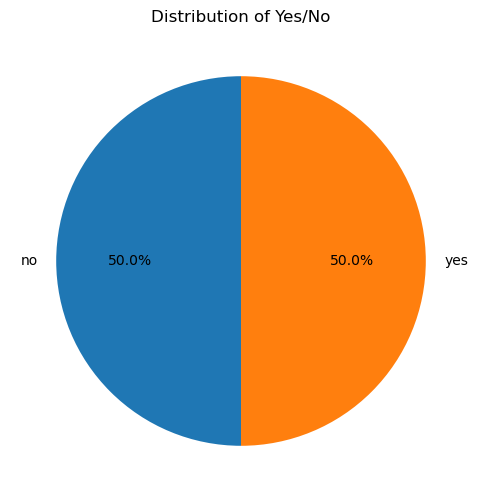

In [44]:
# Plot pie chart to check SMOTE result
y_series = pd.Series(y_res)
counts = y_series.value_counts()
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Yes/No")
plt.show()


## Create pipeline to run all the classification algorithms at one time

In [45]:
 def run_all_classifiers(x_train, x_test, y_train, y_test, show_plots=True):

    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(),
        "SVM": SVC(probability=True),
        "KNN": KNeighborsClassifier(),
        "Naive Bayes": GaussianNB()
    }

    results = []

    for name, model in models.items():
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)

        # evaluation metrics
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

        results.append({
            'Model': name,
            'Accuracy': acc,
            'Precision': prec,
            'Recall': rec,
            'F1-Score': f1
        })

        
        if show_plots:
            plt.figure(figsize=(6, 4))
            sns.histplot(y_test, color='red', alpha=0.6, label='Actual')
            sns.histplot(y_pred, color='gold', alpha=0.6, label='Predicted')
            plt.title(f"{name} — Actual vs Predicted")
            plt.legend()
            plt.show()

        
        print(f"\n Model: {name}")
        print(classification_report(y_test, y_pred))
        print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
        print("-" * 60)

        temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
        print(temp_df.head(10))

   
    results_df = pd.DataFrame(results).sort_values('F1-Score', ascending=False)
    print("\n Model Comparison Summary:\n")
    print(results_df)

    # Highlight best model
    best_model = results_df.iloc[0]['Model']
    print(f"\n Best Model: {best_model}")

    return results_df

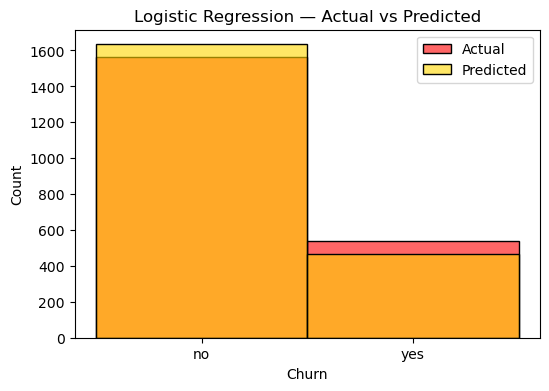


 Model: Logistic Regression
              precision    recall  f1-score   support

          no       0.81      0.85      0.83      1564
         yes       0.49      0.42      0.45       539

    accuracy                           0.74      2103
   macro avg       0.65      0.63      0.64      2103
weighted avg       0.73      0.74      0.73      2103

Confusion Matrix:
 [[1323  241]
 [ 311  228]]
------------------------------------------------------------
     Actual Predicted
6882     no        no
6752     no       yes
245      no       yes
1889     no       yes
6830     no        no
3135    yes        no
5997     no       yes
3878     no        no
2717     no        no
2792     no        no


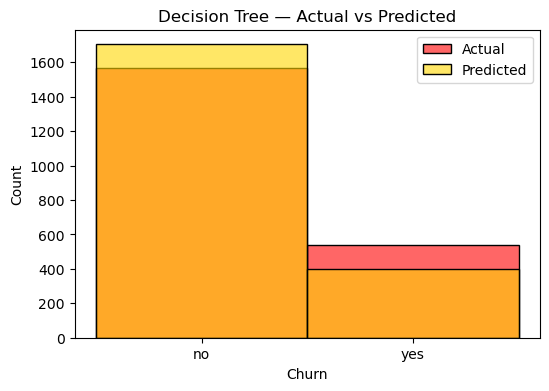


 Model: Decision Tree
              precision    recall  f1-score   support

          no       0.74      0.80      0.77      1564
         yes       0.22      0.16      0.19       539

    accuracy                           0.64      2103
   macro avg       0.48      0.48      0.48      2103
weighted avg       0.60      0.64      0.62      2103

Confusion Matrix:
 [[1253  311]
 [ 451   88]]
------------------------------------------------------------
     Actual Predicted
6882     no       yes
6752     no        no
245      no       yes
1889     no        no
6830     no        no
3135    yes        no
5997     no        no
3878     no       yes
2717     no        no
2792     no        no


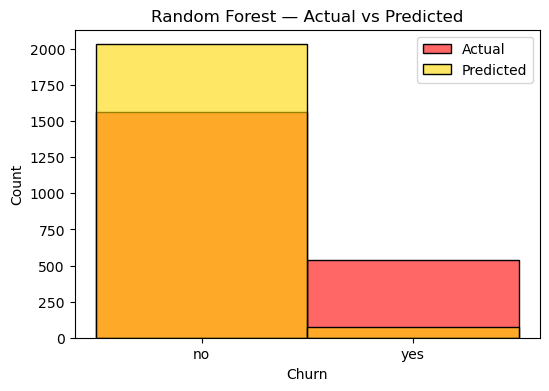


 Model: Random Forest
              precision    recall  f1-score   support

          no       0.75      0.97      0.85      1564
         yes       0.44      0.06      0.10       539

    accuracy                           0.74      2103
   macro avg       0.60      0.52      0.48      2103
weighted avg       0.67      0.74      0.66      2103

Confusion Matrix:
 [[1524   40]
 [ 507   32]]
------------------------------------------------------------
     Actual Predicted
6882     no        no
6752     no        no
245      no       yes
1889     no        no
6830     no        no
3135    yes        no
5997     no        no
3878     no        no
2717     no        no
2792     no        no


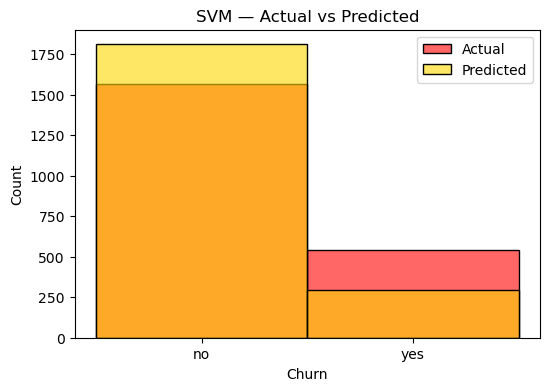


 Model: SVM
              precision    recall  f1-score   support

          no       0.76      0.88      0.82      1564
         yes       0.38      0.21      0.27       539

    accuracy                           0.71      2103
   macro avg       0.57      0.55      0.54      2103
weighted avg       0.67      0.71      0.68      2103

Confusion Matrix:
 [[1384  180]
 [ 427  112]]
------------------------------------------------------------
     Actual Predicted
6882     no        no
6752     no       yes
245      no        no
1889     no       yes
6830     no        no
3135    yes        no
5997     no        no
3878     no        no
2717     no        no
2792     no        no


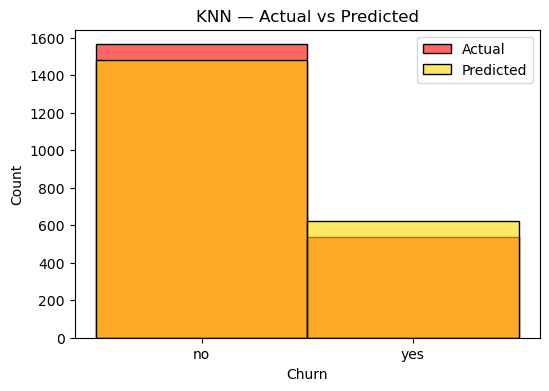


 Model: KNN
              precision    recall  f1-score   support

          no       0.81      0.77      0.79      1564
         yes       0.42      0.48      0.45       539

    accuracy                           0.70      2103
   macro avg       0.62      0.63      0.62      2103
weighted avg       0.71      0.70      0.70      2103

Confusion Matrix:
 [[1203  361]
 [ 279  260]]
------------------------------------------------------------
     Actual Predicted
6882     no       yes
6752     no        no
245      no       yes
1889     no       yes
6830     no        no
3135    yes        no
5997     no       yes
3878     no       yes
2717     no       yes
2792     no        no


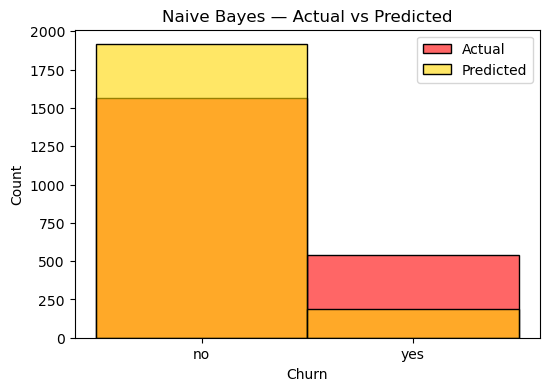


 Model: Naive Bayes
              precision    recall  f1-score   support

          no       0.74      0.90      0.81      1564
         yes       0.21      0.07      0.11       539

    accuracy                           0.69      2103
   macro avg       0.47      0.49      0.46      2103
weighted avg       0.60      0.69      0.63      2103

Confusion Matrix:
 [[1415  149]
 [ 500   39]]
------------------------------------------------------------
     Actual Predicted
6882     no        no
6752     no       yes
245      no        no
1889     no        no
6830     no        no
3135    yes        no
5997     no        no
3878     no        no
2717     no        no
2792     no        no

 Model Comparison Summary:

                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.737518   0.726749  0.737518  0.731277
4                  KNN  0.695673   0.710999  0.695673  0.702333
3                  SVM  0.711365   0.666656  0.711365  0.679031
2        Random Fo

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.737518,0.726749,0.737518,0.731277
4,KNN,0.695673,0.710999,0.695673,0.702333
3,SVM,0.711365,0.666656,0.711365,0.679031
2,Random Forest,0.739895,0.671961,0.739895,0.657388
5,Naive Bayes,0.691393,0.602691,0.691393,0.632462
1,Decision Tree,0.637660,0.603391,0.637660,0.618381


In [46]:
run_all_classifiers(X_res , x_test_transformed , y_res , y_test)

# Observations:

- Logistic Regression achieved the best overall performance with the highest balance of accuracy, precision, recall, and F1-score.

- Random Forest showed similar accuracy to Logistic Regression but had a lower F1-score, indicating less consistent performance across classes.

- KNN and SVM performed moderately, with reasonable accuracy but lower precision and F1-scores compared to the top model.

- Naive Bayes and Decision Tree had the lowest performance metrics, making them the least suitable for this dataset.